In [ ]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import keras
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
#from tensorflow.python.keras.optimizer_v2.adam import Adam

In [ ]:
df_train = pd.read_csv('drive/MyDrive/capstone_data/training_data_w_cas.csv')
df_holdout = pd.read_csv('drive/MyDrive/capstone_data/hold_out_test_w_cas.csv')

X_train = df_train.drop(["Activity", 'guide_seq', 'label'], axis=1)
y_train = df_train['label']

X_test = df_holdout.drop(["Activity", 'guide_seq', 'label'], axis=1)
y_test = df_holdout['label']

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 55)                6930      
                                                                 
 dropout_5 (Dropout)         (None, 55)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 56        
                                                                 
Total params: 6,986
Trainable params: 6,986
Non-trainable params: 0
_________________________________________________________________
None


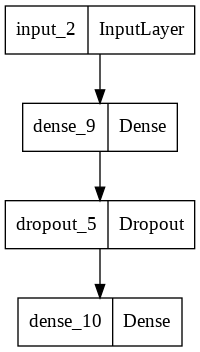

In [ ]:
# visible = Input(shape=(125,)) # input layer
# hidden1 = Dense(55, activation='relu')(visible) # 60 
# output = Dense(1, activation='sigmoid')(hidden1) # 1 for output

# visible = Input(shape=(125,)) # input layer
# hidden1 = Dense(55, activation='relu')(visible) # 60 
# #hidden2 = Dense(30, activation='relu')(hidden1) # 60 
# dropout = Dropout(0.2)(hidden1)
# output = Dense(1, activation='sigmoid')(dropout) # 1 for output
# model = Model(inputs=visible, outputs=output)

# convert to sequential
model = Sequential()
model.add(Input(shape=(125,)))
model.add(Dense(55, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# model = Sequential([
#           Dense(units=55, activation="relu"),
#           Dropout(0.2),
#           Dense(units=1, activation="sigmoid"),
#       ])

# compile model
# np.random.seed(42)
# #opt = tf.keras.optimizers.Adam(learning_rate=0.05)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])

# input_shape= 125
# model.build(input_shape)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

In [ ]:
# compile model
np.random.seed(42)
#opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])

# stop epoch when loss increases after 5 epoch?
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, validation_split=0.3, callbacks=[es])
history = model.fit(X_train, y_train, epochs=20, validation_split=0.3, callbacks=[es])


test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test auc:", test_scores[1])

Epoch 1/20
195/195 [==============================] - 3s 8ms/step - loss: 0.6398 - auc: 0.6782 - val_loss: 0.7266 - val_auc: 0.5410
Epoch 2/20
195/195 [==============================] - 1s 4ms/step - loss: 0.5895 - auc: 0.7463 - val_loss: 0.7385 - val_auc: 0.5355
Epoch 3/20
195/195 [==============================] - 1s 3ms/step - loss: 0.5706 - auc: 0.7669 - val_loss: 0.7294 - val_auc: 0.5349
Epoch 4/20
195/195 [==============================] - 1s 3ms/step - loss: 0.5578 - auc: 0.7806 - val_loss: 0.7285 - val_auc: 0.5338
Epoch 5/20
195/195 [==============================] - 1s 3ms/step - loss: 0.5433 - auc: 0.7941 - val_loss: 0.7258 - val_auc: 0.5341
Epoch 6/20
195/195 [==============================] - 1s 3ms/step - loss: 0.5299 - auc: 0.8088 - val_loss: 0.7251 - val_auc: 0.5414
Epoch 7/20
195/195 [==============================] - 1s 3ms/step - loss: 0.5175 - auc: 0.8187 - val_loss: 0.7258 - val_auc: 0.5390
Epoch 8/20
195/195 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
# get ROC curve score and Precision-Recall
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)


120/120 [==============================] - 0s 1ms/step


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, auc

def auROC_plot(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    auroc = auc(fpr, tpr)


    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = 'MLP AUC = %0.2f' % auroc) # blue=cpf1, orange=adapt, green=dc
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

120/120 [==============================] - 0s 1ms/step
--- 0.36635589599609375 seconds ---


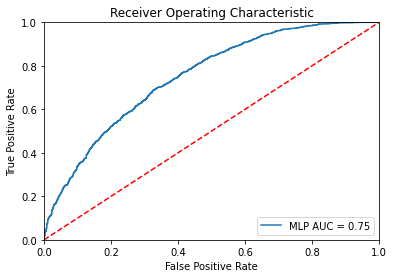

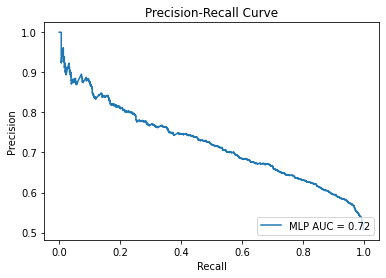

In [ ]:
from sklearn.metrics import precision_recall_curve
import time
# AUROC SCORE

start_time = time.time()
y_pred_proba = model.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

list_fpr = list(fpr)
list_tpr = list(tpr)
df_scores_auc = pd.DataFrame({'FPR': list_fpr, 'TPR': list_tpr})

df_scores_auc.to_csv("MLP_fpr_tpr.csv", sep=',')

auROC_plot(y_test, y_pred_proba)

# PRECISION-RECALL SCORE
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
list_pr = list(precision)
list_rc = list(recall)
df_scores_rc = pd.DataFrame({'Precision': list_pr, 'Recall': list_rc})
df_scores_rc.to_csv("MLP_pr_rc.csv", sep=',')

# create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, label = 'MLP AUC = %0.2f' % pr_auc)

# add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

# display plot
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# get recall, precision, F1, accuracy, and auc* scores of test

predictions_cv = (y_pred_proba > 0.5).astype(np.int)
print(y_test)
print(predictions_cv)
print(y_pred_proba)

0       0
1       1
2       0
3       1
4       1
       ..
3813    0
3814    0
3815    0
3816    1
3817    0
Name: label, Length: 3818, dtype: int64
[[0]
 [1]
 [1]
 ...
 [0]
 [1]
 [1]]
[[0.39262074]
 [0.8105297 ]
 [0.5955011 ]
 ...
 [0.41463166]
 [0.50956863]
 [0.65832466]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix

aupr = auc(recall, precision)

# report metrics
report = classification_report(y_test, predictions_cv, output_dict=True)
m_corr = matthews_corrcoef(y_test, predictions_cv, sample_weight=None)
df_report = pd.DataFrame(report).transpose()

# save confusion matrix
df_confusion_matrix = pd.DataFrame(confusion_matrix(predictions_cv, y_test))
df_confusion_matrix.to_csv("MLP_confusion matrix.csv", sep=',')

print(df_report)
print("MCorr: ", m_corr)
print("aupr: ", aupr)
print("auroc: ", roc_auc)

#output report
df_report.to_csv("MLP_report.csv", sep=',')

              precision    recall  f1-score      support
0              0.689601  0.675759  0.682610  1943.000000
1              0.670846  0.684800  0.677751  1875.000000
accuracy       0.680199  0.680199  0.680199     0.680199
macro avg      0.680224  0.680280  0.680181  3818.000000
weighted avg   0.680391  0.680199  0.680224  3818.000000
MCorr:  0.3605031809973618
aupr:  0.7227209422644116
auroc:  0.7498609023846285


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 53.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=528c68c1db145e7dbe6aea5e5dab6b36bef1add52a4e73fb1dc22a79d1076cec
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
# from sklearn.inspection import permutation_importance

# perm_importance = permutation_importance(model, X_train, y_train, scoring=)

# feature_names = list(X_train.columns)
# features = np.array(feature_names)

# sorted_idx = perm_importance.importances_mean.argsort()
# plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance")
# plt.show()

Train: 0.843, Test: 0.752


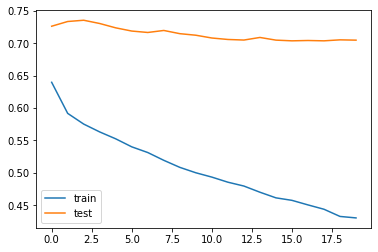

In [ ]:
# evaluate the model
_, train_auc = model.evaluate(X_train, y_train, verbose=0)
_, test_auc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_auc, test_auc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
prediction = model.predict(X_test)
print(prediction)

[[0.45553973]
 [0.8127053 ]
 [0.5677802 ]
 ...
 [0.26031053]
 [0.3859004 ]
 [0.6498186 ]]


**Convolutional Neural Networks - CNN**
1. **Done** - Assign one-hot encoding to guide sequences
2. **Done** - Pad shorter sequences with zeroes
3. **Done** - Concatenate encoded gRNA to train and test datasets
4. Create CNN network
5. Add LSTM to network
6. Add MLP to network

In [ ]:
import numpy as np
#one hot encoding dna
def onehote(sequence):
    mapping = {"A": 0, "C": 1, "G": 2, "T": 3}
    seq2 = [mapping[i] for i in sequence]
    return np.eye(4)[seq2]

encodedRNA_train = list()
encodedRNA_test = list()
for seq_train in df_train['guide_seq']:
    encodedRNA_train.append(onehote(seq_train))

for seq_test in df_holdout['guide_seq']:
    encodedRNA_test.append(onehote(seq_test))

df_encodedRNA_train = pd.DataFrame({'encoded_gRNA': encodedRNA_train})
df_encodedRNA_test = pd.DataFrame({'encoded_gRNA': encodedRNA_test})

df_encodedRNA_train.to_csv('encodedRNA_train.csv', sep=',')
df_encodedRNA_test.to_csv('encodedRNA_test.csv', sep=',')

print(len(df_encodedRNA_test))
print(len(df_encodedRNA_train))

3818
8906


In [ ]:
# apply padding of DNA sequences 

import tensorflow as tf
paddingRNA_train=tf.keras.preprocessing.sequence.pad_sequences(encodedRNA_train, padding="post")
paddingRNA_test=tf.keras.preprocessing.sequence.pad_sequences(encodedRNA_test, padding="post")

paddedRNA_train = list()
paddedRNA_test = list()
for padded  in paddingRNA_train:
    paddedRNA_train.append(padded)

for padded  in paddingRNA_test:
    paddedRNA_test.append(padded)

print(df_train['guide_seq'][0])
print(paddedRNA_train[0].T)

df_paddingRNA_train = pd.DataFrame({'paddedRNA_train': paddedRNA_train})
df_paddingRNA_test= pd.DataFrame({'paddedRNA_test': paddedRNA_test})

df_paddingRNA_train.to_csv('paddedRNA_train.csv', sep=',')
df_paddingRNA_test.to_csv('paddedRNA_test.csv', sep=',')

print(len(df_paddingRNA_train))
print(len(df_paddingRNA_test))

CCGGCTGCAGGTCCCAGGTG
[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]
8906
3818


In [ ]:
# concatenate padded sequences to dataframes

df_train['one_hot'] = paddedRNA_train
df_holdout['one_hot'] = paddedRNA_test

df_train.to_csv('training_data_w_onehot.csv', sep=',')
df_holdout.to_csv('holdout_data_w_onehot.csv', sep=',')

In [ ]:
X_train_seq = df_train['one_hot']
X_test_seq = df_holdout['one_hot']

y_train_seq = df_train['label']
y_test_seq = df_holdout['label']

In [ ]:
def one_hot_enc(seq):
    #get sequence into an array
    seq_array = np.array(list(seq))
      
    #integer encode the sequence
    label_encoder = LabelEncoder()
    integer_encoded_seq = label_encoder.fit_transform(seq_array)
      
    #one hot the sequence
    onehot_encoder = OneHotEncoder(sparse=False)
    #reshape because that's what OneHotEncoder likes
    integer_encoded_seq = integer_encoded_seq.reshape(len(integer_encoded_seq), 1)
    onehot_encoded_seq = onehot_encoder.fit_transform(integer_encoded_seq)
    return onehot_encoded_seq

In [ ]:
# one_hot_train = []
# for seq in df_train['guide_seq']:
#     one_hot_train.append(one_hot_enc(seq).T)

In [ ]:
pad_RNA_train = np.array(paddingRNA_train)
pad_RNA_test = np.array(paddingRNA_test)
train_features = pad_RNA_train.astype(float)
test_features = pad_RNA_test.astype(float)

print(train_features[1].shape)

(28, 4)


In [ ]:
def encodeLabel(labels):
    one_hot_encoder = OneHotEncoder()
    labels = np.array(labels).reshape(-1, 1)
    labels = one_hot_encoder.fit_transform(labels).toarray()
    return labels

# le = LabelEncoder()
# train_labels_en = le.fit_transform(y_train_seq)
# test_labels_en = le.fit_transform(y_test_seq)

train_labels=encodeLabel(y_train_seq)
test_labels=encodeLabel(y_test_seq)

# train_labels = np.array(y_train_seq).astype(float)
# test_labels = y_test_seq.astype(float)
	


In [ ]:
# TOKENIZE DNA Seq
# from keras.preprocessing.text import Tokenizer

# def tokenizer_seq(seq):
#   t  = Tokenizer()
#   fit_text = "ACTG"
#   t.fit_on_texts(fit_text)
#   token_seq = t.texts_to_sequences(seq)
#   return token_seq

# token_train = []
# for seq in df_train['guide_seq']:
#     token_train.append(tokenizer_seq(seq))

# token_test = []
# for seq in df_holdout['guide_seq']:
#     token_test.append(tokenizer_seq(seq))

# tokenRNA_train=tf.keras.preprocessing.sequence.pad_sequences(token_train, padding="post")
# tokenRNA_test=tf.keras.preprocessing.sequence.pad_sequences(token_test, padding="post")

# tokenRNA_train = tokenRNA_train.astype(float)
# tokenRNA_test = tokenRNA_test.astype(float)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 28, 150)           1350      
                                                                 
 batch_normalization_3 (Batc  (None, 28, 150)          600       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 28, 150)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 28, 200)           60200     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 14, 200)          0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2800)             

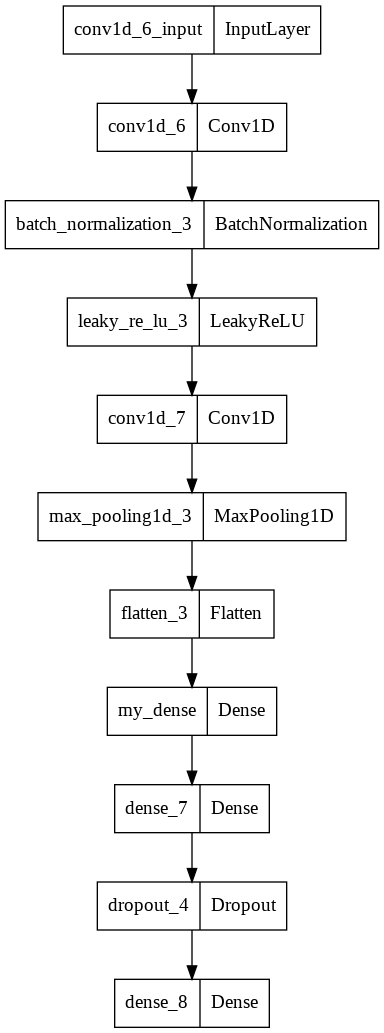

In [ ]:
import numpy as np
import keras
from scipy.io import loadmat
from numpy import array,argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from warnings import simplefilter
import tensorflow as tf
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from keras.models import Sequential
from sklearn import metrics
from scipy.io import loadmat
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.optimizer_v2.adam import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=150, kernel_size=2, input_shape=(train_features.shape[1], 4), 
                padding='same', activation='relu'))
model_cnn.add(BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"))
model_cnn.add(LeakyReLU(alpha=0.1))
#model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=200, kernel_size=2, padding='same', activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(200, activation='relu', name='my_dense'))
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(2, activation='sigmoid'))

# model = Sequential()
# model.add(Conv1D(filters=100, kernel_size=6, input_shape=(train_features.shape[1], 4), 
#                 padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=200, kernel_size=21, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(2, activation='softmax'))

#adam = Adam(learning_rate = 0.03)
#opt = tf.keras.optimizers.Adam(learning_rate=0.03)
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])
model_cnn.summary()
plot_model(model_cnn, to_file='CNN_graph.png')

In [ ]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
# history = model.fit(train_features, train_labels, 
#                     epochs=10, verbose=2, validation_split=0.3, batch_size=300, shuffle=True, callbacks=[es])

# datagen = ImageDataGenerator(
#     width_shift_range=0.2,
#     shear_range = False,
#     horizontal_flip = True)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # will stop when auc stopped increasing after 3 epoch
history = model_cnn.fit(train_features, train_labels, batch_size=300, 
                    epochs=10, verbose=2, validation_split=0.3, shuffle=True, callbacks=[es])

# each output is the probability of the first class
#predicted_labels = model_cnn.predict(np.argmax(test_features))
scores = model_cnn.evaluate(test_features, test_labels, verbose=0)

print(scores[1])

Epoch 1/10
21/21 - 4s - loss: 0.6528 - auc_5: 0.6687 - val_loss: 0.7560 - val_auc_5: 0.5332 - 4s/epoch - 209ms/step
Epoch 2/10
21/21 - 3s - loss: 0.5723 - auc_5: 0.7679 - val_loss: 0.7567 - val_auc_5: 0.5326 - 3s/epoch - 142ms/step
Epoch 3/10
21/21 - 3s - loss: 0.5365 - auc_5: 0.8041 - val_loss: 0.7949 - val_auc_5: 0.5422 - 3s/epoch - 144ms/step
Epoch 4/10
21/21 - 3s - loss: 0.5232 - auc_5: 0.8152 - val_loss: 0.7821 - val_auc_5: 0.5448 - 3s/epoch - 146ms/step
Epoch 5/10
21/21 - 3s - loss: 0.5079 - auc_5: 0.8279 - val_loss: 0.7723 - val_auc_5: 0.5582 - 3s/epoch - 143ms/step
Epoch 6/10
21/21 - 3s - loss: 0.4967 - auc_5: 0.8367 - val_loss: 0.7975 - val_auc_5: 0.5490 - 3s/epoch - 144ms/step
Epoch 6: early stopping
0.7370617985725403


In [ ]:
test_labels

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

Train: 0.760, Test: 0.737


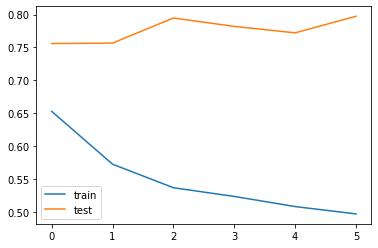

In [ ]:
# evaluate the model
_, train_auc = model_cnn.evaluate(train_features, train_labels, verbose=0)
_, test_auc = model_cnn.evaluate(test_features, test_labels, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_auc, test_auc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

120/120 [==============================] - 1s 7ms/step
--- 0.9273922443389893 seconds ---
120/120 [==============================] - 1s 7ms/step


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


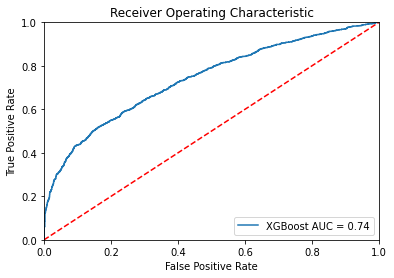

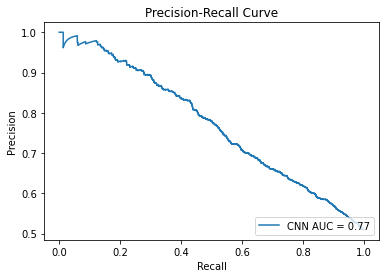

In [ ]:
from sklearn.metrics import precision_recall_curve
import time
# AUROC SCORE

start_time = time.time()
y_pred_proba = model_cnn.predict(test_features)
print("--- %s seconds ---" % (time.time() - start_time))

y_pred_proba = model_cnn.predict(test_features)[:,0]
test_labels = test_labels[:,0]

#print(y_test)

label_cnn = (y_pred_proba > 0.5).astype(np.int)

fpr, tpr, _ = metrics.roc_curve(test_labels, y_pred_proba)
roc_auc = metrics.roc_auc_score(test_labels, y_pred_proba)

list_fpr = list(fpr)
list_tpr = list(tpr)
df_scores_auc = pd.DataFrame({'FPR': list_fpr, 'TPR': list_tpr})

df_scores_auc.to_csv("CNN_fpr_tpr.csv", sep=',')

auROC_plot(test_labels, y_pred_proba)

# PRECISION-RECALL SCORE
precision, recall, thresholds = precision_recall_curve(test_labels, y_pred_proba)
pr_auc = auc(recall, precision)
list_pr = list(precision)
list_rc = list(recall)
df_scores_rc = pd.DataFrame({'Precision': list_pr, 'Recall': list_rc})
df_scores_rc.to_csv("CNN_pr_rc.csv", sep=',')

# create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, label = 'CNN AUC = %0.2f' % pr_auc)

# add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

# display plot
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# report metrics
report = classification_report(test_labels, label_cnn, output_dict=True)
m_corr = matthews_corrcoef(test_labels, label_cnn, sample_weight=None)
df_report = pd.DataFrame(report).transpose()
#output report
df_report.to_csv("CNN_report.csv", sep=',')

# save confusion matrix
df_confusion_matrix = pd.DataFrame(confusion_matrix(label_cnn, test_labels))
df_confusion_matrix.to_csv("CNN_confusion matrix.csv", sep=',')

print(df_report)
print("MCorr: ", m_corr)
print("aupr: ", pr_auc)
print("auroc: ", roc_auc)

              precision    recall  f1-score      support
0.0            0.666103  0.629867  0.647478  1875.000000
1.0            0.660636  0.695317  0.677533  1943.000000
accuracy       0.663174  0.663174  0.663174     0.663174
macro avg      0.663369  0.662592  0.662505  3818.000000
weighted avg   0.663320  0.663174  0.662773  3818.000000
MCorr:  0.3259598401424438
aupr:  0.7713713886051634
auroc:  0.7394604906501974


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 28, 4)]      0           []                               
                                                                                                  
 conv1d_2 (Conv1D)              (None, 28, 100)      1700        ['input_4[0][0]']                
                                                                                                  
 max_pooling1d_1 (MaxPooling1D)  (None, 14, 100)     0           ['conv1d_2[0][0]']               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 14, 200)      80200       ['max_pooling1d_1[0][0]']        
                                                                                            

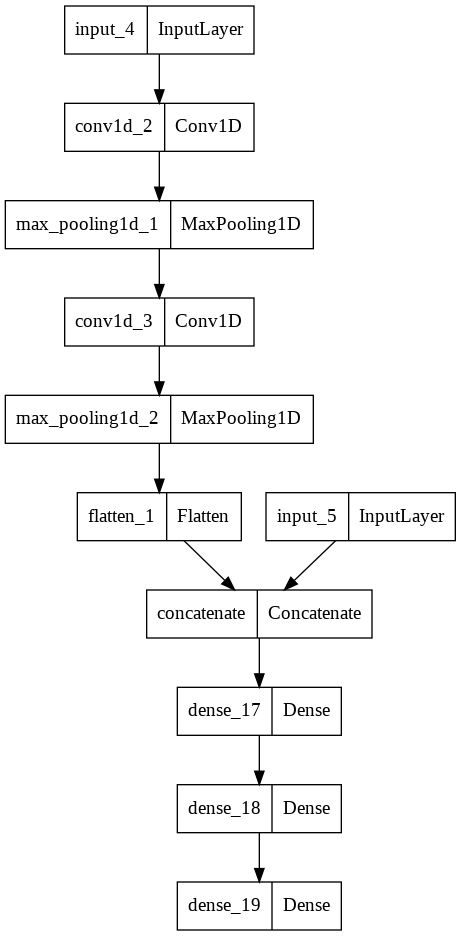

In [ ]:

# Convert Sequential API to Functional API
input_shape = (28, 4)
batch_size = 128
kernel_size = 3
filters = 64
dropout = 0.3

# utiliaing functional API to build cnn layers
visible1 = Input(shape=input_shape)
y = Conv1D(filters=100, kernel_size=4, padding='same', activation='relu')(visible1)
y = MaxPooling1D(pool_size=2)(y)
y = Conv1D(filters=200, kernel_size=4, padding='same', activation='relu')(y)
y = MaxPooling1D(pool_size=2)(y)

# convert image to vector 
flat1 = Flatten()(y)

# numerical input layer - MLP
flat2 = Input(shape=(125,))
#flat3 = Dense(60, activation='relu')(flat2)

hidden = tf.keras.layers.Concatenate()([flat1, flat2])
hidden = Dense(200, activation='relu')(hidden) # 60 
hidden = Dense(100, activation='relu')(hidden) # 60 

output = Dense(1, activation='sigmoid')(hidden)

# model building by supplying inputs/outputs
model_hybrid = Model(inputs=(visible1, flat2), outputs=output)

model_hybrid.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])
model_hybrid.summary()
plot_model(model_hybrid, to_file='CNN+MLP_graph.png')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model_hybrid.fit([train_features, X_train], y_train, 
                    epochs=10, verbose=2, validation_split=0.3, batch_size=130, shuffle=True, callbacks=[es])

Epoch 1/10


ValueError: ignored

In [ ]:
#predicted_labels = model_hybrid.predict(np.stack([test_features, X_test]))
scores = model_hybrid.evaluate([test_features, X_test], test_labels, verbose=0)

print(scores[1])

0.748214602470398


In [ ]:
# evaluate the model
_, train_auc = model.evaluate(train_features, train_labels, verbose=0)
_, test_auc = model.evaluate(test_features, test_labels, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_auc, test_auc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**CNN-XGBoost Hybrid**

In [ ]:
# extract intermediate layer


from keras.models import Model
layer_name='my_dense'
intermediate_layer_model = Model(inputs=model_cnn.input,
                                 outputs=model_cnn.get_layer(layer_name).output)

intermediate_layer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6_input (InputLayer)  [(None, 28, 4)]          0         
                                                                 
 conv1d_6 (Conv1D)           (None, 28, 150)           1350      
                                                                 
 batch_normalization_3 (Batc  (None, 28, 150)          600       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 28, 150)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 28, 200)           60200     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 14, 200)          0         
 1D)                                                       

In [ ]:
intermediate_output = intermediate_layer_model.predict(train_features) 
intermediate_output = pd.DataFrame(data=intermediate_output)
val_data = intermediate_output[2672:]
submission_cnn = model_cnn.predict(test_features)

intermediate_output.to_csv('intermediate_output_train.csv', sep=',')

120/120 [==============================] - 1s 7ms/step


In [ ]:
intermediate_test_output = intermediate_layer_model.predict(test_features)
intermediate_test_output = pd.DataFrame(data=intermediate_test_output)

120/120 [==============================] - 1s 8ms/step


In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from xgboost import cv
import time

xgbmodel = XGBClassifier(objective='binary:logistic', learning_rate = 0.03,
              max_depth = 60, n_estimators = 200, gamma=0.2, subsample=0.6)


evaluation = [( intermediate_output, y_train), ( intermediate_test_output, y_test)]

xgbmodel.fit(intermediate_output, y_train, eval_set=evaluation, eval_metric="auc", early_stopping_rounds=10)

start_time = time.time()
preds = xgbmodel.predict(intermediate_test_output)
print("--- %s seconds ---" % (time.time() - start_time))



[0]	validation_0-auc:0.86592	validation_1-auc:0.678935
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.920509	validation_1-auc:0.698902
[2]	validation_0-auc:0.9428	validation_1-auc:0.715818
[3]	validation_0-auc:0.954921	validation_1-auc:0.720406
[4]	validation_0-auc:0.964056	validation_1-auc:0.724471
[5]	validation_0-auc:0.969521	validation_1-auc:0.726367
[6]	validation_0-auc:0.973384	validation_1-auc:0.726693
[7]	validation_0-auc:0.976024	validation_1-auc:0.728671
[8]	validation_0-auc:0.978	validation_1-auc:0.728686
[9]	validation_0-auc:0.980077	validation_1-auc:0.730495
[10]	validation_0-auc:0.982128	validation_1-auc:0.73249
[11]	validation_0-auc:0.98386	validation_1-auc:0.733397
[12]	validation_0-auc:0.985193	validation_1-auc:0.734228
[13]	validation_0-auc:0.986335	validation_1-auc:0.734699
[14]	validation_0-auc:0.986959	validation_1-auc:0.736782
[15]	v

In [ ]:
y_pred_proba = xgbmodel.predict_proba(intermediate_test_output)[::, 1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, preds, output_dict=True)
accuracy = accuracy_score(y_test, preds)
print(report)
print('Accuracy: ', accuracy)
print('ROC_AUC: ', roc_auc) # is this global minima or local minima?

{'0': {'precision': 0.7017744705208929, 'recall': 0.6309830159547092, 'f1-score': 0.6644986449864498, 'support': 1943}, '1': {'precision': 0.6537904394012555, 'recall': 0.7221333333333333, 'f1-score': 0.6862645717181957, 'support': 1875}, 'accuracy': 0.675746464117339, 'macro avg': {'precision': 0.6777824549610743, 'recall': 0.6765581746440212, 'f1-score': 0.6753816083523227, 'support': 3818}, 'weighted avg': {'precision': 0.6782097616813644, 'recall': 0.675746464117339, 'f1-score': 0.6751877787271579, 'support': 3818}}
Accuracy:  0.675746464117339
ROC_AUC:  0.7448624463887459


In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)


In [ ]:
list_fpr = list(fpr)
list_tpr = list(tpr)
df_scores_auc = pd.DataFrame({'FPR': list_fpr, 'TPR': list_tpr})

df_scores_auc.to_csv("CNNXGB_fpr_tpr.csv", sep=',')

# PRECISION-RECALL SCORE
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
list_pr = list(precision)
list_rc = list(recall)
df_scores_rc = pd.DataFrame({'Precision': list_pr, 'Recall': list_rc})
df_scores_rc.to_csv("CNNXGB_pr_rc.csv", sep=',')

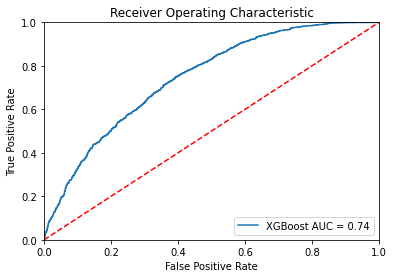

In [ ]:
import matplotlib.pyplot as plt
def auROC_plot(y_test, y_pred_proba):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = 'XGBoost AUC = %0.2f' % roc_auc) # blue=cpf1, orange=adapt, green=dc
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
  
auROC_plot(y_test, y_pred_proba)

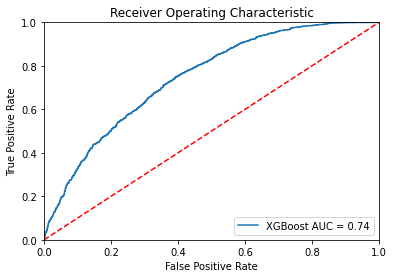

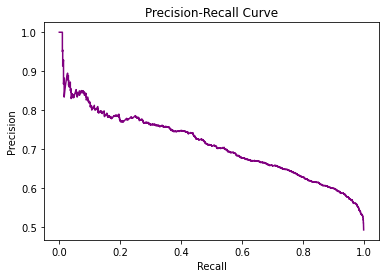

0.7448624463887459


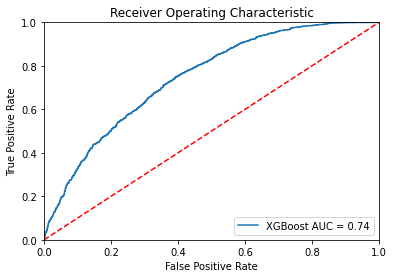

              precision    recall  f1-score      support
0              0.689601  0.675759  0.682610  1943.000000
1              0.670846  0.684800  0.677751  1875.000000
accuracy       0.680199  0.680199  0.680199     0.680199
macro avg      0.680224  0.680280  0.680181  3818.000000
weighted avg   0.680391  0.680199  0.680224  3818.000000
MCorr:  0.3605031809973618
aupr:  0.7106844731189477
auroc:  0.7448624463887459


In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)

list_fpr = list(fpr)
list_tpr = list(tpr)
df_scores_auc = pd.DataFrame({'FPR': list_fpr, 'TPR': list_tpr})

df_scores_auc.to_csv("CNNXGB_fpr_tpr.csv", sep=',')

auROC_plot(y_test, y_pred_proba)

# PRECISION-RECALL SCORE
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
aupr = auc(recall, precision)
list_pr = list(precision)
list_rc = list(recall)
df_scores_rc = pd.DataFrame({'Precision': list_pr, 'Recall': list_rc})
df_scores_rc.to_csv("CNNXGB_pr_rc.csv", sep=',')

# create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

# add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

# display plot
plt.show()

print(roc_auc)
auROC_plot(y_test, y_pred_proba)

# report metrics
report = classification_report(y_test, predictions_cv, output_dict=True)
m_corr = matthews_corrcoef(y_test, predictions_cv, sample_weight=None)
df_report = pd.DataFrame(report).transpose()

# save confusion matrix
df_confusion_matrix = pd.DataFrame(confusion_matrix(predictions_cv, y_test))
df_confusion_matrix.to_csv("CNNXGB_confusion matrix.csv", sep=',')

print(df_report)
print("MCorr: ", m_corr)
print("aupr: ", aupr)
print("auroc: ", roc_auc)

#output report
df_report.to_csv("CNNXGB_report.csv", sep=',')